In [1]:
# How to build an AI that can answer questions about your website
# Issue raised: https://github.com/openai/openai-python/issues/676
# https://platform.openai.com/docs/tutorials/web-qa-embeddings
# https://learn.microsoft.com/en-us/azure/ai-services/openai/tutorials/embeddings?tabs=python-new%2Ccommand-line
   
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

# Define root domain to crawl
domain = "openai.com"
full_url = "https://openai.com/"

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))


def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        # Save text from the url to a <url>.txt file
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w") as f:

            # Get the text from the URL using BeautifulSoup
            soup = BeautifulSoup(requests.get(url).text, "html.parser")

            # Get the text but remove the tags
            text = soup.get_text()

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
            if ("You need to enable JavaScript to run this app." in text):
                print("Unable to parse page " + url + " due to JavaScript being required")
            
            # Otherwise, write the text to the file in the text directory
            f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)

crawl(full_url)

https://openai.com/
https://openai.com/gpt-4
https://openai.com/customer-stories/government-of-iceland
https://openai.com/customer-stories/government-of-iceland#content
https://openai.com/customer-stories?topics=language
https://openai.com/customer-stories/typeform
https://openai.com/customer-stories/typeform#content
https://openai.com/customer-stories/inworld-ai
https://openai.com/customer-stories/inworld-ai#content
https://openai.com/customer-stories/ironclad
https://openai.com/customer-stories/ironclad#content
https://openai.com/customer-stories/viable
https://openai.com/customer-stories/viable#content
https://openai.com/customer-stories/yabble
https://openai.com/customer-stories/yabble#content
https://openai.com/customer-stories/retool
https://openai.com/customer-stories/retool#content
https://openai.com/customer-stories#content
https://openai.com/customer-stories/waymark
https://openai.com/customer-stories/waymark#content
https://openai.com/gpt-4#content
https://openai.com/researc

https://openai.com/research?models=musenet
https://openai.com/blog/the-power-of-continuous-learning
https://openai.com/blog/solving-rubiks-cube
https://openai.com/research?authors=matthias-plappert
https://openai.com/research?authors=jerry-tworek
https://openai.com/research?topics=sim-to-real
https://openai.com/research?authors=wojciech-zaremba
https://openai.com/research?authors=alex-paino
https://openai.com/research?authors=bob-mcgrew
https://openai.com/research?models=dactyl
https://openai.com/research?authors=qiming-yuan
https://openai.com/research?authors=raphael-ribas
https://openai.com/research?authors=lei-zhang
https://openai.com/research?authors=ilge-akkaya
https://openai.com/research?authors=arthur-petron
https://openai.com/research?authors=marcin-andrychowicz
https://openai.com/blog/learning-dexterity
https://openai.com/research?authors=diane-yoon
https://openai.com/research/openai-five
https://openai.com/research/openai-five#content
https://openai.com/research?authors=filip

https://openai.com/blog/concrete-ai-safety-problems
https://openai.com/research/faulty-reward-functions#content
https://openai.com/research?authors=vicki-pfau
https://openai.com/research/retro-contest-results#content
https://openai.com/research/openai-five-defeats-dota-2-world-champions#content
https://openai.com/research/openai-five-defeats-dota-2-world-champions#replays
https://openai.com/research/openai-five#our-approach
https://openai.com/blog/openai-five-finals
https://openai.com/five/#overview
https://openai.com/blog/openai-five-finals#content
https://openai.com/blog/openai-five-finals#OpenAI
https://openai.com/blog/the-international-2018-results
https://openai.com/research/the-international-2018-results#content
https://openai.com/research/the-international-2018-results#rules-change
https://openai.com/blog/solving-rubiks-cube/#challenges
https://openai.com/blog/the-power-of-continuous-learning#content
https://openai.com/blog/new-and-improved-content-moderation-tooling
https://ope

https://openai.com/careers/media-relations-corporate-communications#content
https://openai.com/careers/solutions-architect
https://openai.com/careers/solutions-architect#content
https://openai.com/careers/software-engineer-anti-fraud-abuse
https://openai.com/careers/software-engineer-anti-fraud-abuse#content
https://openai.com/careers/software-engineer-triton-compiler
https://openai.com/careers/software-engineer-triton-compiler#content
https://openai.com/careers/eu-policy-and-partnerships-lead
https://openai.com/careers/eu-policy-and-partnerships-lead#content
https://openai.com/careers/sales-engineer
https://openai.com/careers/sales-engineer#content
https://openai.com/careers/security-engineer-detection-response
https://openai.com/careers/security-engineer-detection-response#content
https://openai.com/careers/software-engineer-developer-experience
https://openai.com/careers/software-engineer-developer-experience#content
https://openai.com/careers/media-relations-europe-lead-2
https://o

https://openai.com/careers/software-engineer-infrastructure#content
https://openai.com/blog/scaling-kubernetes-to-7500-nodes
https://openai.com/blog/scaling-kubernetes-to-7500-nodes/#unsolvedproblems
https://openai.com/blog/scaling-kubernetes-to-2500-nodes
https://openai.com/research/scaling-kubernetes-to-2500-nodes#content
https://openai.com/research?authors=benjamin-chess
https://openai.com/research/scaling-kubernetes-to-7500-nodes#content
https://openai.com/careers/research-engineer-fine-tuning-api
https://openai.com/careers/research-engineer-fine-tuning-api#content
https://openai.com/careers/research-scientist-superalignment
https://openai.com/careers/research-scientist-superalignment#content
https://openai.com/careers/research-engineer-post-training-infra
https://openai.com/careers/research-engineer-post-training-infra#content
https://openai.com/careers/engineering-manager-ai-inference-systems
https://openai.com/careers/engineering-manager-ai-inference-systems#content
https://open

https://openai.com/blog/language-model-safety-and-misuse/#misuse
https://openai.com/blog/instruction-following
https://openai.com/research/instruction-following#content
https://openai.com/research?authors=miles-brundage
https://openai.com/research?authors=steven-adler
https://openai.com/research?authors=pamela-mishkin
https://openai.com/blog/economic-impacts
https://openai.com/blog/economic-impacts#TynaEloundou
https://openai.com/blog/economic-impacts#content
https://openai.com/blog/economic-impacts#PamelaMishkin
https://openai.com/blog?authors=sam-manning
https://openai.com/blog?authors=pamela-mishkin
https://openai.com/blog/economic-impacts#SamManning
https://openai.com/research?authors=gretchen-krueger
https://openai.com/api
https://openai.com/product#content
https://openai.com/product#made-for-developers
https://openai.com/research?authors=sandhini-agarwal
https://openai.com/blog/gpt-3-apps
https://openai.com/blog/openai-api
https://openai.com/blog/openai-api#GregBrockman
https://o

https://openai.com/blog?authors=john-allard
https://openai.com/blog/gpt-3-5-turbo-fine-tuning-and-api-updates#JohnAllard
https://openai.com/blog/gpt-3-5-turbo-fine-tuning-and-api-updates#content
https://openai.com/blog/gpt-3-5-turbo-fine-tuning-and-api-updates#AndrewPeng
https://openai.com/blog/partnership-with-american-journalism-project-to-support-local-news
https://openai.com/blog/partnership-with-american-journalism-project-to-support-local-news#content
https://openai.com/blog/custom-instructions-for-chatgpt
https://openai.com/blog/insights-from-global-conversations
https://openai.com/blog/new-ways-to-manage-your-data-in-chatgpt
https://openai.com/blog/new-ways-to-manage-your-data-in-chatgpt#content
https://openai.com/blog/new-ways-to-manage-your-data-in-chatgpt#OpenAI
https://openai.com/blog/insights-from-global-conversations#OpenAI
https://openai.com/policies/api-data-usage-policies
https://openai.com/blog/openai-cybersecurity-grant-program
https://openai.com/blog/openai-cybersec

https://openai.com/five
https://openai.com/research/image-gpt
https://openai.com/research/musenet
https://openai.com/research/solving-rubiks-cube
https://openai.com/research/emergent-tool-use
https://openai.com/research?topics=multi-agent
https://openai.com/research?authors=todor-markov
https://openai.com/research?authors=ingmar-kanitscheider
https://openai.com/research?authors=yi-wu
https://openai.com/blog/competitive-self-play
https://openai.com/research/emergent-tool-use#content
https://openai.com/research/language-models-are-few-shot-learners
https://openai.com/research?authors=melanie-subbiah
https://openai.com/research?authors=ariel-herbert-voss
https://openai.com/research?authors=jared-kaplan
https://openai.com/research?authors=tom-henighan
https://openai.com/research?authors=benjamin-mann
https://openai.com/research?authors=pranav-shyam
https://openai.com/research?authors=nick-ryder
https://openai.com/research?authors=arvind-neelakantan
https://openai.com/research?authors=sam-m

In [2]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [12]:
import pandas as pd

# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

,fname,text
0,careers workplace coordinator#content,careers workplace coordinator#content. Workpl...
1,careers research scientist safety#content,careers research scientist safety#content. Re...
2,research?authors=henk tillman,research?authors=henk tillman. Research index...
3,research?authors=arthur petron,research?authors=arthur petron. Research inde...
4,dall e 3#content,dall e 3#content. DALL·E 3 CloseSearch Sub...


In [14]:
df.shape

(1120, 2)

<Axes: >

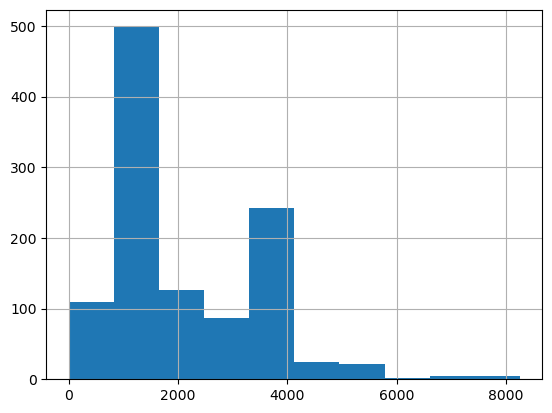

In [15]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [16]:
print(df.shape)
df.head()

(1120, 3)


,title,text,n_tokens
0,careers workplace coordinator#content,careers workplace coordinator#content. Workpl...,1083
1,careers research scientist safety#content,careers research scientist safety#content. Re...,1028
2,research?authors=henk tillman,research?authors=henk tillman. Research index...,3808
3,research?authors=arthur petron,research?authors=arthur petron. Research inde...,3808
4,dall e 3#content,dall e 3#content. DALL·E 3 CloseSearch Sub...,1281


In [17]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    # Add the last chunk to the list of chunks
    if chunk:
        chunks.append(". ".join(chunk) + ".")

    return chunks
    

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<Axes: >

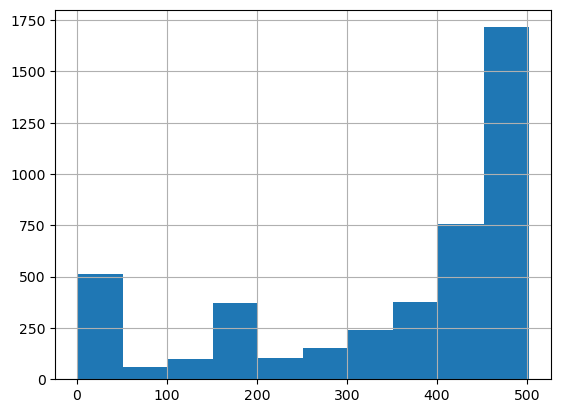

In [18]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [19]:
print(df.shape)
df.head()

(4390, 2)


,text,n_tokens
0,careers workplace coordinator#content. Workpl...,369
1,We offer relocation assistance to new employee...,350
2,Pursuant to the San Francisco Fair Chance Ordi...,365
3,careers research scientist safety#content. Re...,361
4,You will play a critical role in shaping how a...,500


In [61]:
import openai

from openai import OpenAI
import os
from dotenv import load_dotenv


load_dotenv()
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))


# Function to get embeddings
def get_embedding(text, model="text-embedding-ada-002"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input = [text], model=model).data[0].embedding

df['embeddings'] = df.text.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))


#save the DataFrame with the embeddings to a CSV file
df.to_csv('processed/embeddings.csv')


# Display the head of the DataFrame
print(df.shape)
df.head()

(4390, 3)


,text,n_tokens,embeddings
0,careers workplace coordinator#content. Workpl...,369,"[0.012893767096102238, -0.03086814656853676, -..."
1,We offer relocation assistance to new employee...,350,"[0.0007493332959711552, -0.02076251059770584, ..."
2,Pursuant to the San Francisco Fair Chance Ordi...,365,"[0.010783202946186066, -0.027911068871617317, ..."
3,careers research scientist safety#content. Re...,361,"[0.001521143945865333, -0.025264957919716835, ..."
4,You will play a critical role in shaping how a...,500,"[-0.008352475240826607, -0.031112296506762505,..."


In [139]:
# To load the data from a saved file, you can run the following:

import pandas as pd
import numpy as np
from ast import literal_eval

df = pd.read_csv('processed/embeddings.csv')
df['embeddings'] = df.embeddings.apply(eval).apply(np.array)

In [140]:
df.head()

,Unnamed: 0,text,n_tokens,embeddings
0,0,careers workplace coordinator#content. Workpl...,369,"[0.012893767096102238, -0.03086814656853676, -..."
1,1,We offer relocation assistance to new employee...,350,"[0.0007493332959711552, -0.02076251059770584, ..."
2,2,Pursuant to the San Francisco Fair Chance Ordi...,365,"[0.010783202946186066, -0.027911068871617317, ..."
3,3,careers research scientist safety#content. Re...,361,"[0.001521143945865333, -0.025264957919716835, ..."
4,4,You will play a critical role in shaping how a...,500,"[-0.008352475240826607, -0.031112296506762505,..."


In [151]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def get_embedding(text, model="text-embedding-ada-002"): # model = "deployment_name"
    return client.embeddings.create(input = [text], model=model).data[0].embedding


def search_docs(df, user_query, top_n=4, to_print=True):
    embedding = get_embedding(
        user_query,
        model="text-embedding-ada-002"
    )
    df["similarities"] = df.embeddings.apply(lambda x: cosine_similarity(x, embedding))

    res = df.sort_values("similarities", ascending=False).head(top_n)

    return res, user_query  # Return the DataFrame and the question

def answer_question_with_summary(df, question):
    reference_text = df.iloc[0]['text']

    system_message = {
        "role": "system", 
        "content": "You are an assistant who summarizes information and answers questions based on provided text. Answer the question based on the context, and if the question can't be answered based on the context, say I don't know"
    }

    user_message = {
        "role": "user", 
        "content": f"Here is some information: {reference_text} Based on this, can you answer the question: {question}?"
    }

    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[system_message, user_message]
    )

    return completion.choices[0].message.content


In [150]:
# Example usage:
question_to_answer = "Am I allowed to publish model outputs to Twitter, without a human review?"
res, question = search_docs(df, question_to_answer, top_n=4)
print(answer_question_with_summary(res, question))

Based on the information provided, it appears that you are generally allowed to publish your own prompts or completions to social media platforms like Twitter without a human review. However, it is important to manually review each generation before sharing and attribute the content to your name or your company. Additionally, it is crucial to indicate that the content is AI-generated in a way that no user could reasonably miss or misunderstand. It is also important to adhere to OpenAI's Content Policy and avoid sharing content that violates it or may offend others.


In [149]:
# Ask questions like a chatbot

def ask_questions_loop(df):
    while True:
        question_to_answer = input("Enter your question (or type 'quit' to exit): ")
        if question_to_answer.lower() == 'quit':
            break

        res, question = search_docs(df, question_to_answer, top_n=4)
        answer = answer_question_with_summary(res, question)
        print("Answer:", answer)

# Example usage:
ask_questions_loop(df)

Enter your question (or type 'quit' to exit): Am I allowed to publish model outputs to Twitter, without a human review?
Answer: No, according to the provided information, it states that you should "manually review each generation before sharing or while streaming." Therefore, you are not allowed to publish model outputs to Twitter without a human review.
Enter your question (or type 'quit' to exit): who is ludwig schubert?
Answer: Based on the provided information, it can be deduced that Ludwig Schubert is an author involved in research. Unfortunately, no further information is given, so I don't know any additional details about Ludwig Schubert.
Enter your question (or type 'quit' to exit): who is nick cammarata?
Answer: Based on the provided information ("research?authors=nick cammarata"), it can be inferred that Nick Cammarata is an author associated with research. However, there are no specific details about who Nick Cammarata is or their expertise.
Enter your question (or type 'qui